<center><h1 style="color:green">Image Classification Using Convolutional Neural Network (CNN)</center>

<img src="small_images.jpg">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

<b> Loading CIFAR10 dataset

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[4]

array([[[170, 180, 198],
        [168, 178, 196],
        [177, 185, 203],
        ...,
        [162, 179, 215],
        [158, 178, 214],
        [157, 177, 212]],

       [[168, 181, 198],
        [172, 185, 201],
        [171, 183, 200],
        ...,
        [159, 177, 212],
        [156, 176, 211],
        [154, 174, 209]],

       [[154, 170, 186],
        [149, 165, 181],
        [129, 144, 162],
        ...,
        [161, 178, 214],
        [157, 177, 212],
        [154, 174, 209]],

       ...,

       [[ 74,  84,  80],
        [ 76,  85,  81],
        [ 78,  85,  82],
        ...,
        [ 71,  75,  78],
        [ 68,  72,  75],
        [ 61,  65,  68]],

       [[ 68,  76,  77],
        [ 69,  77,  78],
        [ 72,  79,  78],
        ...,
        [ 76,  80,  83],
        [ 71,  75,  78],
        [ 71,  75,  78]],

       [[ 67,  75,  78],
        [ 68,  76,  79],
        [ 69,  75,  76],
        ...,
        [ 75,  79,  82],
        [ 71,  75,  78],
        [ 73,  77,  80]]

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)

In [9]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

<b>Image showing

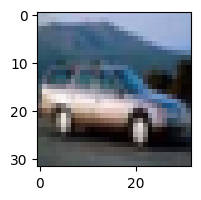

In [10]:
plt.figure(figsize = (10,2))
plt.imshow(X_train[4])

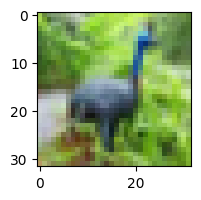

In [11]:
plt.figure(figsize = (10,2))
plt.imshow(X_train[6])

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
classes[2]

'bird'

In [14]:
def show(X,y,index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

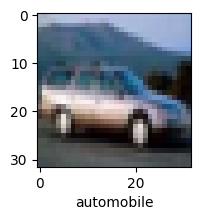

In [15]:
show(X_train, y_train, 4)

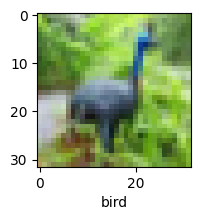

In [16]:
show(X_train, y_train, 6)

<b> Now scaling the dataset by dividing 255 cause it's RGB

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<b> Build ANN

In [18]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.3026 - loss: 1.9328
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.4189 - loss: 1.6464
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.4510 - loss: 1.5481
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.4750 - loss: 1.4929
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.4919 - loss: 1.4407


In [19]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4604 - loss: 1.5273


[1.53399658203125, 0.45320001244544983]

<b>We can see that at the end of 5 epochs, accuracy is at around 45.32%

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.45      0.52      1000
           1       0.55      0.53      0.54      1000
           2       0.53      0.09      0.15      1000
           3       0.30      0.50      0.37      1000
           4       0.45      0.40      0.42      1000
           5       0.52      0.19      0.28      1000
           6       0.56      0.45      0.50      1000
           7       0.51      0.56      0.53      1000
           8       0.61      0.57      0.59      1000
           9       0.34      0.80      0.47      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



<b>Now buld a CNN Model

In [24]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [26]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [27]:
cnn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3600 - loss: 1.7513
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5879 - loss: 1.1732
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6476 - loss: 1.0164
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6740 - loss: 0.9347
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6993 - loss: 0.8653
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7235 - loss: 0.7955
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7396 - loss: 0.7481
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7526 - loss: 0.7141
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7634 - loss: 0.6809
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7746 - loss: 0.6388


After 5 epochs, the CNN achieved an accuracy of approximately 67.40%, marking a significant improvement over the ANN. CNNs are highly effective for image classification, delivering excellent accuracy. Additionally, they are computationally more efficient than simple ANNs, as max pooling reduces image dimensions while retaining essential features.

In [28]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7016 - loss: 0.9367


[0.9494893550872803, 0.6933000087738037]

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[2.0388085e-03, 1.6716809e-05, 1.3467004e-03, 7.3353690e-01,
        1.5539093e-03, 2.3772752e-01, 2.2608617e-02, 2.3084973e-05,
        9.9891424e-04, 1.4876497e-04],
       [2.5799263e-03, 8.2396634e-02, 2.6984391e-05, 2.8683431e-07,
        1.3061586e-07, 1.3772449e-09, 6.1045817e-09, 5.1481017e-08,
        9.1497958e-01, 1.6401047e-05],
       [4.2075706e-01, 6.5814175e-02, 7.7854022e-03, 2.2528032e-03,
        1.1203587e-03, 1.7193152e-04, 1.6755075e-03, 1.5290748e-02,
        4.7990966e-01, 5.2223429e-03],
       [7.6931649e-01, 1.5351899e-01, 3.3004697e-02, 9.0832252e-04,
        9.6638163e-04, 2.1335047e-05, 2.5660763e-04, 1.0941801e-05,
        4.0192381e-02, 1.8038653e-03],
       [9.1557024e-07, 2.4323915e-06, 3.0626724e-02, 9.0319000e-02,
        2.9641533e-01, 3.1708185e-02, 5.5089283e-01, 1.8940189e-05,
        1.5650750e-05, 6.3354562e-08]], dtype=float32)

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [33]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [34]:
y_test = y_test.reshape(-1,)

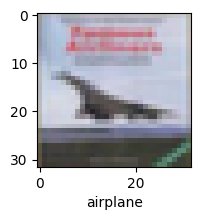

In [35]:
show(X_test, y_test,3)

In [32]:
classes[y_classes[3]]

'airplane'